In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import keras

In [40]:
DATADIR = "C:/Users/TarunKomirishetty/Desktop/2nd Semester/AIT 636 Interpretable Machine Learning/Python codes/Visual Domain Decathlon (Subset)/train"
CATEGORIES = ['0001','0002','0003','0004','0005','0006','0007','0008','0009','0010']
# path = os.path.join(DATADIR, category)
# print(path)

In [22]:
IMG_SIZE = 50
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

In [68]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])

create_training_data()

random.shuffle(training_data)
X_train = []
y_train = []
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_train = np.array(y_train)



In [70]:
np.save("C:/Users/TarunKomirishetty/Desktop/2nd Semester/AIT 636 Interpretable Machine Learning/Python codes/Visual Domain Decathlon (Subset)/X_train",
       X_train)
np.save("C:/Users/TarunKomirishetty/Desktop/2nd Semester/AIT 636 Interpretable Machine Learning/Python codes/Visual Domain Decathlon (Subset)/y_train",
       y_train)

In [71]:
DATADIR = "C:/Users/TarunKomirishetty/Desktop/2nd Semester/AIT 636 Interpretable Machine Learning/Python codes/Visual Domain Decathlon (Subset)/test"
testing_data = []

def create_testing_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            testing_data.append([new_array,class_num])

create_testing_data()

random.shuffle(testing_data)
X_test = []
y_test = []
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_test = np.array(y_test)


In [72]:
np.save("C:/Users/TarunKomirishetty/Desktop/2nd Semester/AIT 636 Interpretable Machine Learning/Python codes/Visual Domain Decathlon (Subset)/X_test",
       X_test)
np.save("C:/Users/TarunKomirishetty/Desktop/2nd Semester/AIT 636 Interpretable Machine Learning/Python codes/Visual Domain Decathlon (Subset)/y_test",
       y_test)

In [85]:
img_size = IMG_SIZE
num_epochs = 10
batch_size = 160

In [86]:
#Normalize pixel values to be between 0 and 1
train_images, test_images = X_train / 255.0, X_test / 255.0

In [87]:
train_labels = y_train
test_labels = y_test

In [88]:
# Create the convolutional base
# The lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
# As input, a CNN takes tensors of shape (image_height, image_width, color_channels).
# In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, # The number of output filters or output channels in the convolution layer, e.g. 32 or 64
                              kernel_size=(3, 3), # The height and width of the 2D convolution/filter window, e.g.(3, 3)
                              strides=(1, 1), # The steps of the convolution or pooling window along the height and width
                              padding='same', # {'valid', 'same'}.
                              # If padding='same', the image will be padded with zeros whenever the convolution window steps outside of the image.
                              # When padding='valid', the input image is not padded. This means that the filter window always stays inside the input image. This type of padding is called valid because for this padding only the valid and original elements of the input image are considered.
                              activation='relu', # {'relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential'} https://keras.io/api/layers/activations/
                              input_shape=(img_size, img_size, 3))) # The dimensions of the input images: (height, width, number of channels).
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')) # Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

In [89]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10))

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)        

In [91]:
model.compile(optimizer='adam', # You can find different optimizers here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function. You can find different loss functions here: https://www.tensorflow.org/api_docs/python/tf/keras/losses
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.
history = model.fit(x=train_images, y=train_labels, batch_size=batch_size, # batch_size is the number of samples per gradient update.
                    epochs=num_epochs, # The number of training iterations over the entire x and y data
                    validation_data=(test_images, test_labels),
                    verbose=1) #By setting verbose 0, 1 or 2 you just say how you want to see the training progress for each epoch.


Epoch 1/10
79/79 [==============================] - 34s 418ms/step - loss: 1.7443 - accuracy: 0.3262 - val_loss: 1.6373 - val_accuracy: 0.4020
Epoch 2/10
79/79 [==============================] - 35s 443ms/step - loss: 1.4521 - accuracy: 0.4548 - val_loss: 1.3838 - val_accuracy: 0.4980
Epoch 3/10
79/79 [==============================] - 37s 472ms/step - loss: 1.3105 - accuracy: 0.5100 - val_loss: 1.3189 - val_accuracy: 0.5061
Epoch 4/10
79/79 [==============================] - 36s 458ms/step - loss: 1.2128 - accuracy: 0.5461 - val_loss: 1.2652 - val_accuracy: 0.5327
Epoch 5/10
79/79 [==============================] - 35s 446ms/step - loss: 1.1440 - accuracy: 0.5697 - val_loss: 1.2282 - val_accuracy: 0.5633
Epoch 6/10
79/79 [==============================] - 35s 449ms/step - loss: 1.0836 - accuracy: 0.6011 - val_loss: 1.1874 - val_accuracy: 0.5714
Epoch 7/10
79/79 [==============================] - 36s 452ms/step - loss: 1.0315 - accuracy: 0.6171 - val_loss: 1.1512 - val_accuracy: 0.5959

In [92]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy is: ', test_acc)


16/16 - 0s - loss: 1.1399 - accuracy: 0.5898 - 339ms/epoch - 21ms/step
Test accuracy is:  0.5897959470748901


In [93]:
# Make Predictions
predictions = model.predict(test_images)

16/16 [==============================] - 0s 22ms/step


In [94]:
print(predictions.shape)
predictions[0]

(490, 10)


array([ 5.101462  , -2.1776383 , -1.3822049 , -2.4725292 , -0.8214763 ,
        0.07219671,  0.5481863 , -0.3609566 ,  2.571584  ,  1.3969865 ],
      dtype=float32)

In [95]:
y_pred = [np.argmax(element) for element in predictions]
y_pred[0]

0

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true=test_labels, y_pred=y_pred, target_names=CATEGORIES, zero_division=0))

              precision    recall  f1-score   support

        0001       0.77      0.94      0.84        49
        0002       0.90      0.92      0.91        49
        0003       0.67      0.49      0.56        49
        0004       0.45      0.35      0.39        49
        0005       0.36      0.45      0.40        49
        0006       0.75      0.31      0.43        49
        0007       0.41      0.53      0.46        49
        0008       0.76      0.59      0.67        49
        0009       0.50      0.49      0.49        49
        0010       0.55      0.84      0.66        49

    accuracy                           0.59       490
   macro avg       0.61      0.59      0.58       490
weighted avg       0.61      0.59      0.58       490



In [108]:
def plot_sample(X, y, index):
    print("Prediced Category is : ",CATEGORIES[y_pred[index]])
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(CATEGORIES[y[index]])

Prediced Category is :  0008


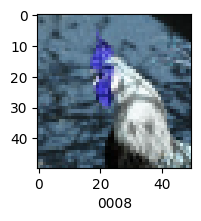

In [110]:
plot_sample(test_images,test_labels,100)